In [15]:
%run functions.ipynb

## Band Limited White Noise

### (1) Damping

In [6]:
zeta = np.linspace(1,10,10)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,zeta[i],4,1,0;
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);

### (2) Overlap

In [ ]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,0.05,4,1,overlap[i];
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);

## Unimodal

### (1) Damping

In [ ]:
zeta = np.linspace(1,10,10)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,zeta[i],4,1,0;
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl);

### (2) Overlap

In [ ]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,0.05,4,1,overlap[i];
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl);

## Bimodal

### (1) Damping

In [ ]:
zeta = np.linspace(1,10,10)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,zeta[i],4,1,0;
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl);

### (2) Overlap

In [ ]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,0.05,4,1,overlap[i];
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl);

### 저주파 크기 떨림

In [16]:
fn = np.array([5,30]);
fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,0.1,4,1,0;
blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl);
# Generate Input PSD
freq_spec = np.logspace(np.log10(fmin),np.log10(fmax),5000); psd_spec = np.zeros(5000); 
for i in range(5000):
    psd_spec[i]= blwn(freq_spec[i],fmin,fmax,bwp,loc);
# Band Split
fi,pi = freq_spec,psd_spec;
dfi,dpi = band_split(fi,pi,2);
# Calculate Fatogie Damage
K = 1;
rpsd1 = pi*HH(fi,fn[0],z)*K;
rpsd2 = dpi[0]*HH(dfi[0],fn[0],z)*K;
rpsd3 = dpi[1]*HH(dfi[1],fn[0],z)*K;
D1= D_dirlik(fi,rpsd1,m=mm,T=1,C=1);
D2= D_dirlik(dfi[0],rpsd2,m=mm,T=1,C=1);
D3= D_dirlik(dfi[1],rpsd3,m=mm,T=1,C=1);

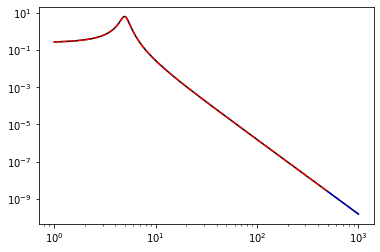

In [11]:
plt.plot(fi,rpsd1,'k-'); plt.plot(dfi[0],rpsd2,'r--'); plt.plot(dfi[1],rpsd3,'b--');
plt.xscale('log'); plt.yscale('log');

In [17]:
D1

3512.0748649575103

In [18]:
D2

3410.3137510156894

In [19]:
D3

6.108474662335251e-09